In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

#### Read the dataset

In [2]:
df = pd.read_csv('german_credit_risk.zip',compression='zip')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Feature Description

In [3]:
# Age (numeric)
# Sex (text: male, female)

# Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident,
# 2 - skilled, 3 - highly skilled)

# Housing (text: own, rent, or free)
# Saving accounts (text - little, moderate, quite rich, rich)
# Checking account
# Credit amount (numeric, in DM)
# Duration (numeric, in month)
# Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, 
# repairs, education, business, vacation/others
# Risk (target Variable - Good or Bad Risk)

In [4]:
df.shape

(1000, 11)

#### Count and Percentage of Null value

In [5]:
def fetch_count_percent_null(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Feature':nv.index,'Count':nv.values,
                         'Percent':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Percent',ascending=False)
    return nv_df

In [6]:
nv_df = fetch_count_percent_null(df)
nv_df

,Feature,Count,Percent
1,Checking account,394,39.4
0,Saving accounts,183,18.3


In [7]:
df['Checking account'].value_counts(dropna=False)

NaN         394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [8]:
df['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [9]:
df.groupby(['Risk','Checking account'])['Checking account'].count()

Risk  Checking account
bad   little              135
      moderate            105
      rich                 14
good  little              139
      moderate            164
      rich                 49
Name: Checking account, dtype: int64

In [11]:
mode_grp = df.groupby('Risk')['Checking account'].transform(lambda x : x.mode()[0])
    
print(mode_grp.shape)
mode_grp[:10]

(1000,)


0    moderate
1      little
2    moderate
3    moderate
4      little
5    moderate
6    moderate
7    moderate
8    moderate
9      little
Name: Checking account, dtype: object

In [12]:
df['Checking account'].value_counts(dropna=False)

NaN         394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [13]:
df['Checking account'] = df['Checking account'].fillna(mode_grp)
df['Checking account'].value_counts(dropna=False)

moderate    617
little      320
rich         63
Name: Checking account, dtype: int64

In [14]:
fetch_count_percent_null(df)

,Feature,Count,Percent
0,Saving accounts,183,18.3


In [15]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [16]:
df.groupby(['Risk','Saving accounts'])['Saving accounts'].count()

Risk  Saving accounts
bad   little             217
      moderate            34
      quite rich          11
      rich                 6
good  little             386
      moderate            69
      quite rich          52
      rich                42
Name: Saving accounts, dtype: int64

In [17]:
df['Saving accounts'] = df['Saving accounts'].fillna('Other')

In [18]:
fetch_count_percent_null(df)

,Feature,Count,Percent


#### Duplicates

In [19]:
df.duplicated().sum()

0

In [20]:
df['Unnamed: 0'].nunique()

1000

In [21]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#### Separate Num and Categorical Feature

In [22]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')
Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')


In [23]:
df['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

In [24]:
df['Duration'].value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: Duration, dtype: int64

#### EDA

#### 1) Countplot

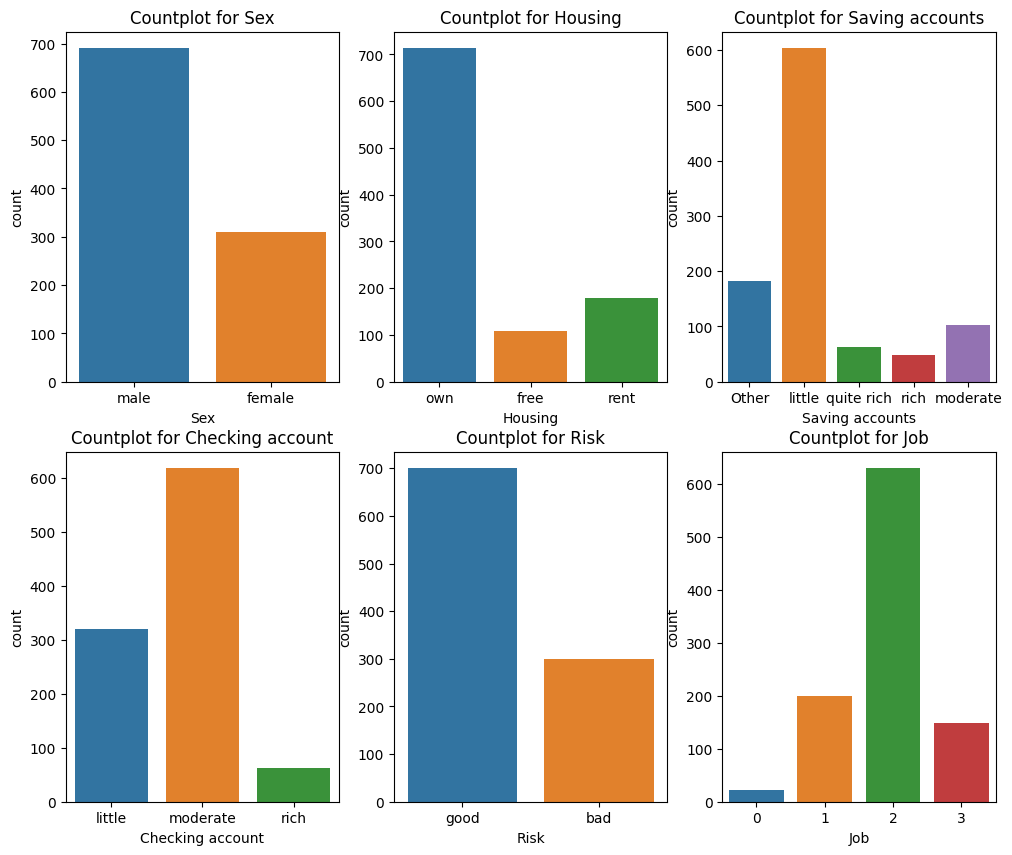

In [25]:
cols =  ['Sex', 'Housing', 'Saving accounts', 
         'Checking account','Risk', 'Job']

plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')
    
plt.show()

In [26]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

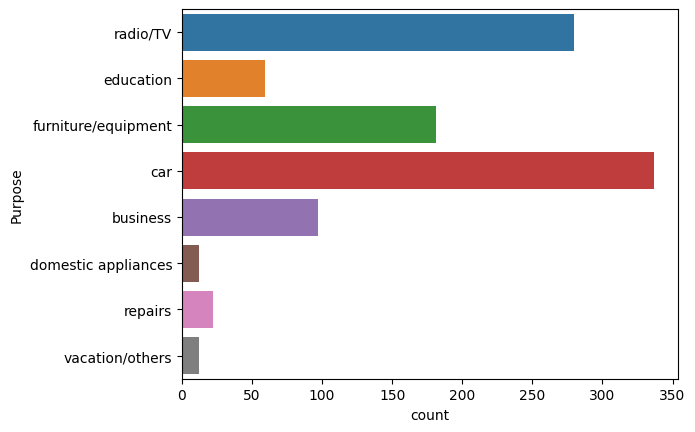

In [27]:
sns.countplot(y=df['Purpose'])
plt.show()

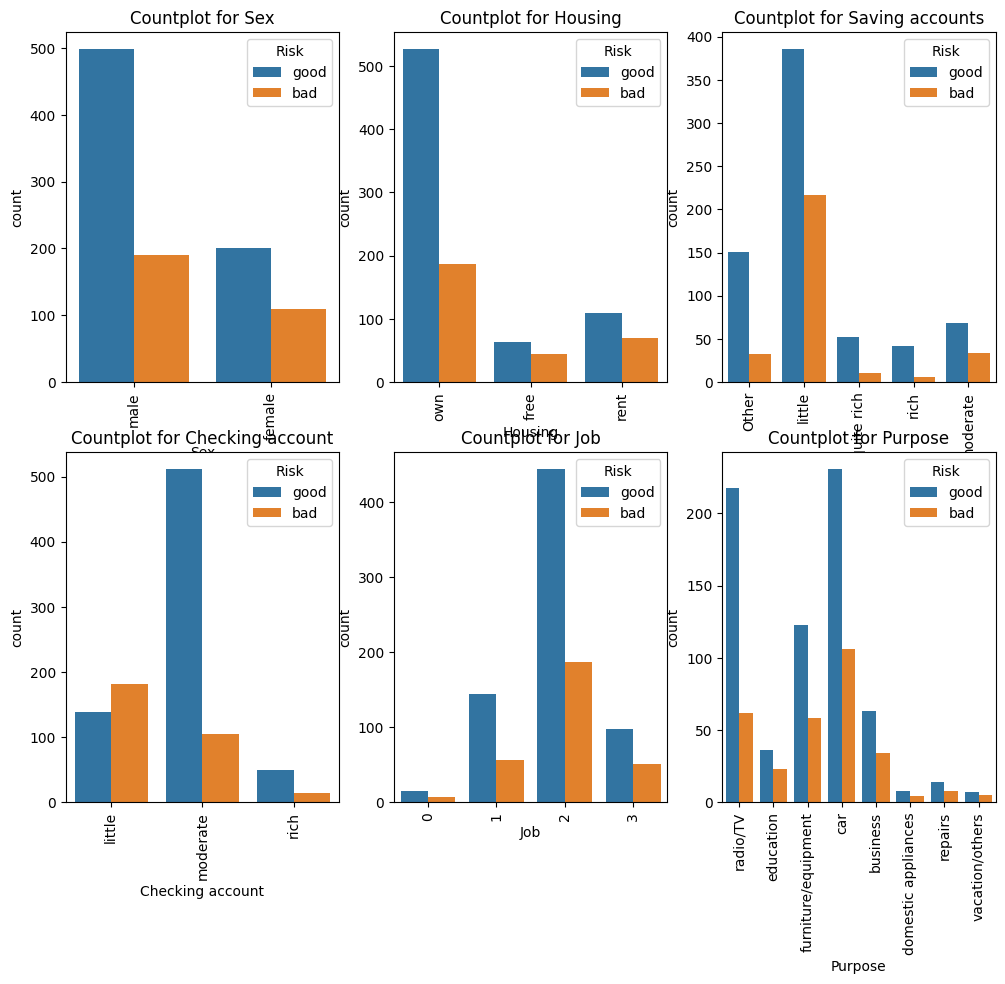

In [28]:
cols =  ['Sex', 'Housing', 'Saving accounts', 
         'Checking account', 'Job','Purpose']

plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=df[cols[i]],hue=df['Risk'])
    plt.title(f'Countplot for {cols[i]}')
    plt.xticks(rotation=90)
    
plt.show()

In [29]:
print(num_cols)

Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')


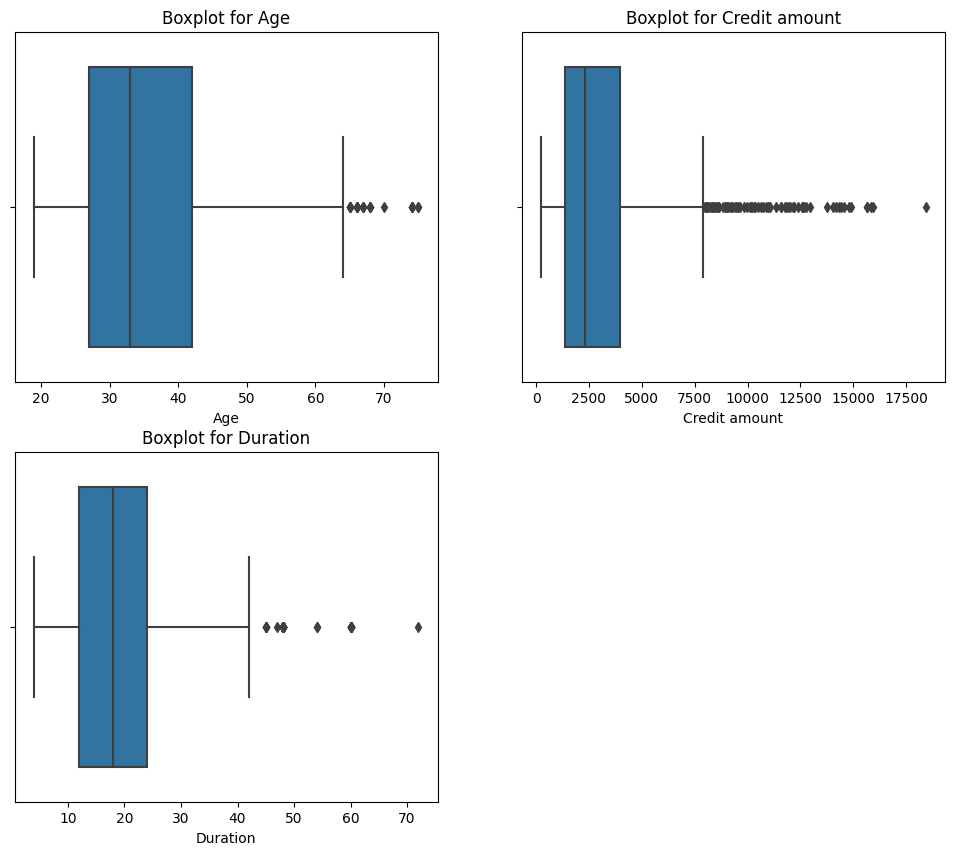

In [30]:
cols = ['Age', 'Credit amount', 'Duration']

plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

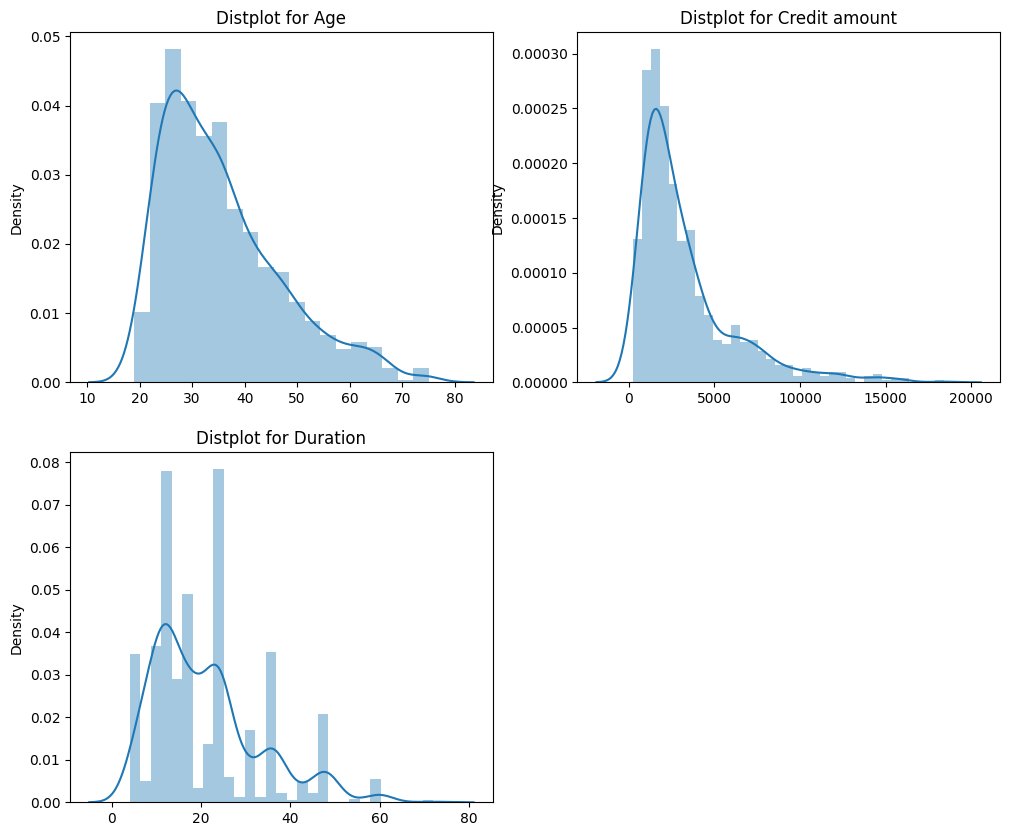

In [31]:
cols = ['Age', 'Credit amount', 'Duration']

plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.distplot(x=df[cols[i]],kde=True)
    plt.title(f'Distplot for {cols[i]}')
plt.show()

#### Correlation

In [32]:
print(num_cols)

Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')


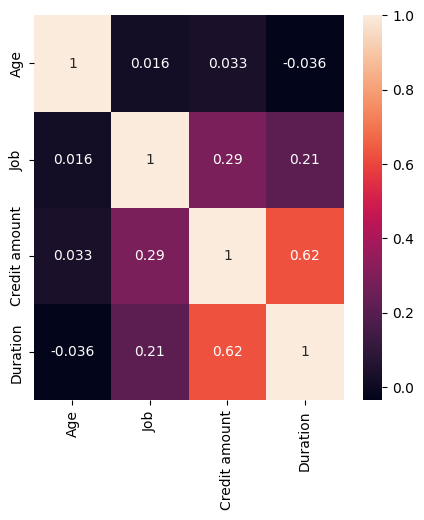

In [33]:
corr = df[['Age', 'Job', 'Credit amount', 'Duration']].corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True)
plt.show()

#### Outlier Treatment

In [34]:
a = df.describe(percentiles=[0.01,0.02,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,97%,98%,99%,max
Age,19.0,20.00,21.00,22.00,33.0,60.0,63.00,65.0,67.01,75.0
Job,0.0,0.00,0.00,1.00,2.0,3.0,3.00,3.0,3.00,3.0
Credit amount,250.0,425.83,570.02,708.95,2319.5,9162.7,10961.39,12169.7,14180.39,18424.0
Duration,4.0,6.00,6.00,6.00,18.0,48.0,48.00,48.0,60.00,72.0


In [35]:
print(df[df['Credit amount']>7500].shape)
print(df[df['Credit amount']>9162.7].shape)
print(df[df['Credit amount']>10961.39].shape)
print(df[df['Credit amount']>12169.7].shape)  # clip thresh
print(df[df['Duration']>48].shape)  # clip thresh
print(df[df['Age']>68].shape)       # clip thresh


(86, 10)
(50, 10)
(30, 10)
(20, 10)
(16, 10)
(7, 10)


#### Outlier Treatment using IQR method

In [36]:
df1 = df.copy()

In [37]:
cols = ['Age','Credit amount','Duration']

for i in cols:
    upper = df[i].quantile(0.98)
    print(i,upper)
    df[i] = np.where(df[i]>upper,upper,df[i])

Age 65.0
Credit amount 12169.699999999999
Duration 48.0


In [38]:
a = df.describe(percentiles=[0.01,0.02,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,97%,98%,99%,max
Age,19.0,20.00,21.00,22.00,33.0,60.0,63.00,65.000,65.0,65.0
Job,0.0,0.00,0.00,1.00,2.0,3.0,3.00,3.000,3.0,3.0
Credit amount,250.0,425.83,570.02,708.95,2319.5,9162.7,10961.39,12169.014,12169.7,12169.7
Duration,4.0,6.00,6.00,6.00,18.0,48.0,48.00,48.000,48.0,48.0


#### Encoding

In [39]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

In [40]:
for i in cat_cols:
    print(i,df[i].nunique(),df[i].unique())

Sex 2 ['male' 'female']
Housing 3 ['own' 'free' 'rent']
Saving accounts 5 ['Other' 'little' 'quite rich' 'rich' 'moderate']
Checking account 3 ['little' 'moderate' 'rich']
Purpose 8 ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk 2 ['good' 'bad']


In [41]:
df['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

#### Label Encoder (Encoding Target Variable)

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
lb = LabelEncoder()
df['Risk'] = lb.fit_transform(df['Risk'])

In [44]:
df['Risk'].value_counts()
# Good = 1
# Bad = 0

1    700
0    300
Name: Risk, dtype: int64

#### Dummy Variables

In [45]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

In [46]:
df_dum = pd.get_dummies(df,columns=['Sex', 'Housing', 
                                         'Saving accounts', 
                                         'Checking account', 
                                         'Purpose'],drop_first=True,
                                         dtype=int)
print(df_dum.shape)
print(df_dum.columns)

(1000, 21)
Index(['Age', 'Job', 'Credit amount', 'Duration', 'Risk', 'Sex_male',
       'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')


#### Select x and y

In [47]:
x = df_dum.drop(['Risk'],axis=1)
y = df_dum['Risk']
print(x.shape)
print(y.shape)

(1000, 20)
(1000,)


#### Split data into train and test

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                 random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 20)
(300, 20)
(700,)
(300,)


#### Function to evalute Model

In [50]:
from sklearn.metrics import *

In [51]:
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    print(classification_report(y_test,ypred))
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    pre1 = precision_score(y_test,ypred)
    rec1 = recall_score(y_test,ypred)
    pre0 = precision_score(y_test,ypred,pos_label=0)
    rec0 = recall_score(y_test,ypred,pos_label=0)
    res = pd.DataFrame({'Train_Acc':train_acc,'test_Acc':test_acc,
                       'Pre0':pre0,'Rec0':rec0,'Pre1':pre1,'Rec1':rec1,
                       },index=[mname])
    return res, ypred

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

#### LogReg

In [53]:
lr1 = LogisticRegression(max_iter=1000)
lr1_res,ypred_lr1 = eval_model(lr1,x_train, x_test, 
                               y_train, y_test,'LogReg1')
lr1_res

              precision    recall  f1-score   support

           0       0.68      0.44      0.53        91
           1       0.79      0.91      0.84       209

    accuracy                           0.77       300
   macro avg       0.73      0.67      0.69       300
weighted avg       0.75      0.77      0.75       300



,Train_Acc,test_Acc,Pre0,Rec0,Pre1,Rec1
LogReg1,0.76,0.766667,0.677966,0.43956,0.788382,0.909091


#### DT - (No Pruning)

In [56]:
dt1 = DecisionTreeClassifier(criterion='entropy')

dt1_res, ypred_dt1 = eval_model(dt1,x_train, x_test, 
                               y_train, y_test,'DT1')
dt1_res

              precision    recall  f1-score   support

           0       0.51      0.56      0.53        91
           1       0.80      0.77      0.78       209

    accuracy                           0.70       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.71      0.70      0.71       300



,Train_Acc,test_Acc,Pre0,Rec0,Pre1,Rec1
DT1,1.0,0.703333,0.51,0.56044,0.8,0.76555


In [58]:
fn = list(x.columns)
cn = ['0','1']

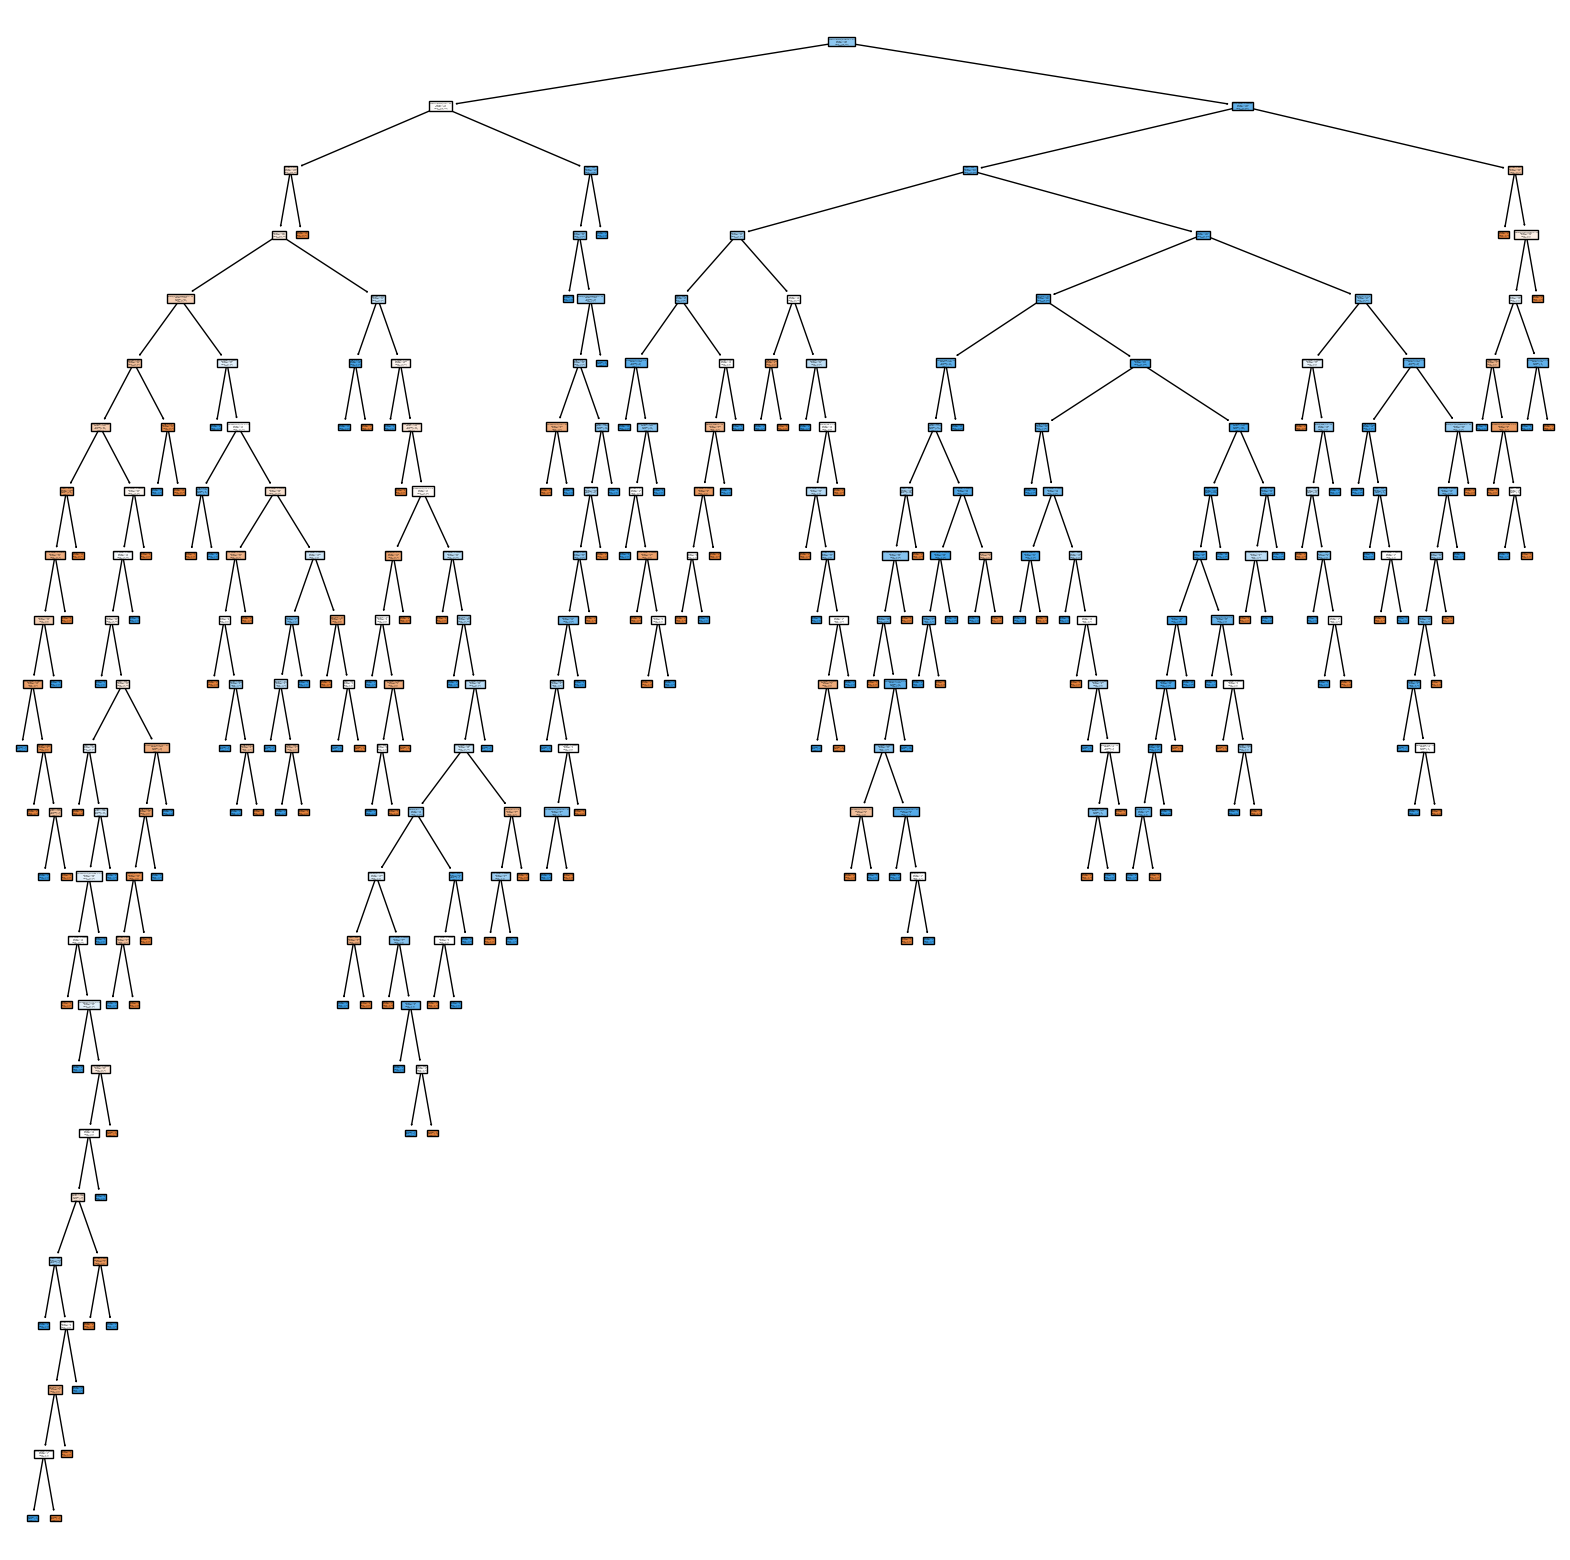

In [59]:
plt.figure(figsize=(20,20))
plot_tree(dt1,feature_names=fn, class_names=cn, filled=True)
plt.show()

In [57]:
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=7,
                             min_samples_split=10)
dt2_res, ypred_dt2 = eval_model(dt2,x_train, x_test, 
                               y_train, y_test,'DT2(Pruned Tree)')
dt2_res

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        91
           1       0.80      0.80      0.80       209

    accuracy                           0.72       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.72      0.72      0.72       300



,Train_Acc,test_Acc,Pre0,Rec0,Pre1,Rec1
DT2(Pruned Tree),0.85,0.716667,0.533333,0.527473,0.795238,0.799043


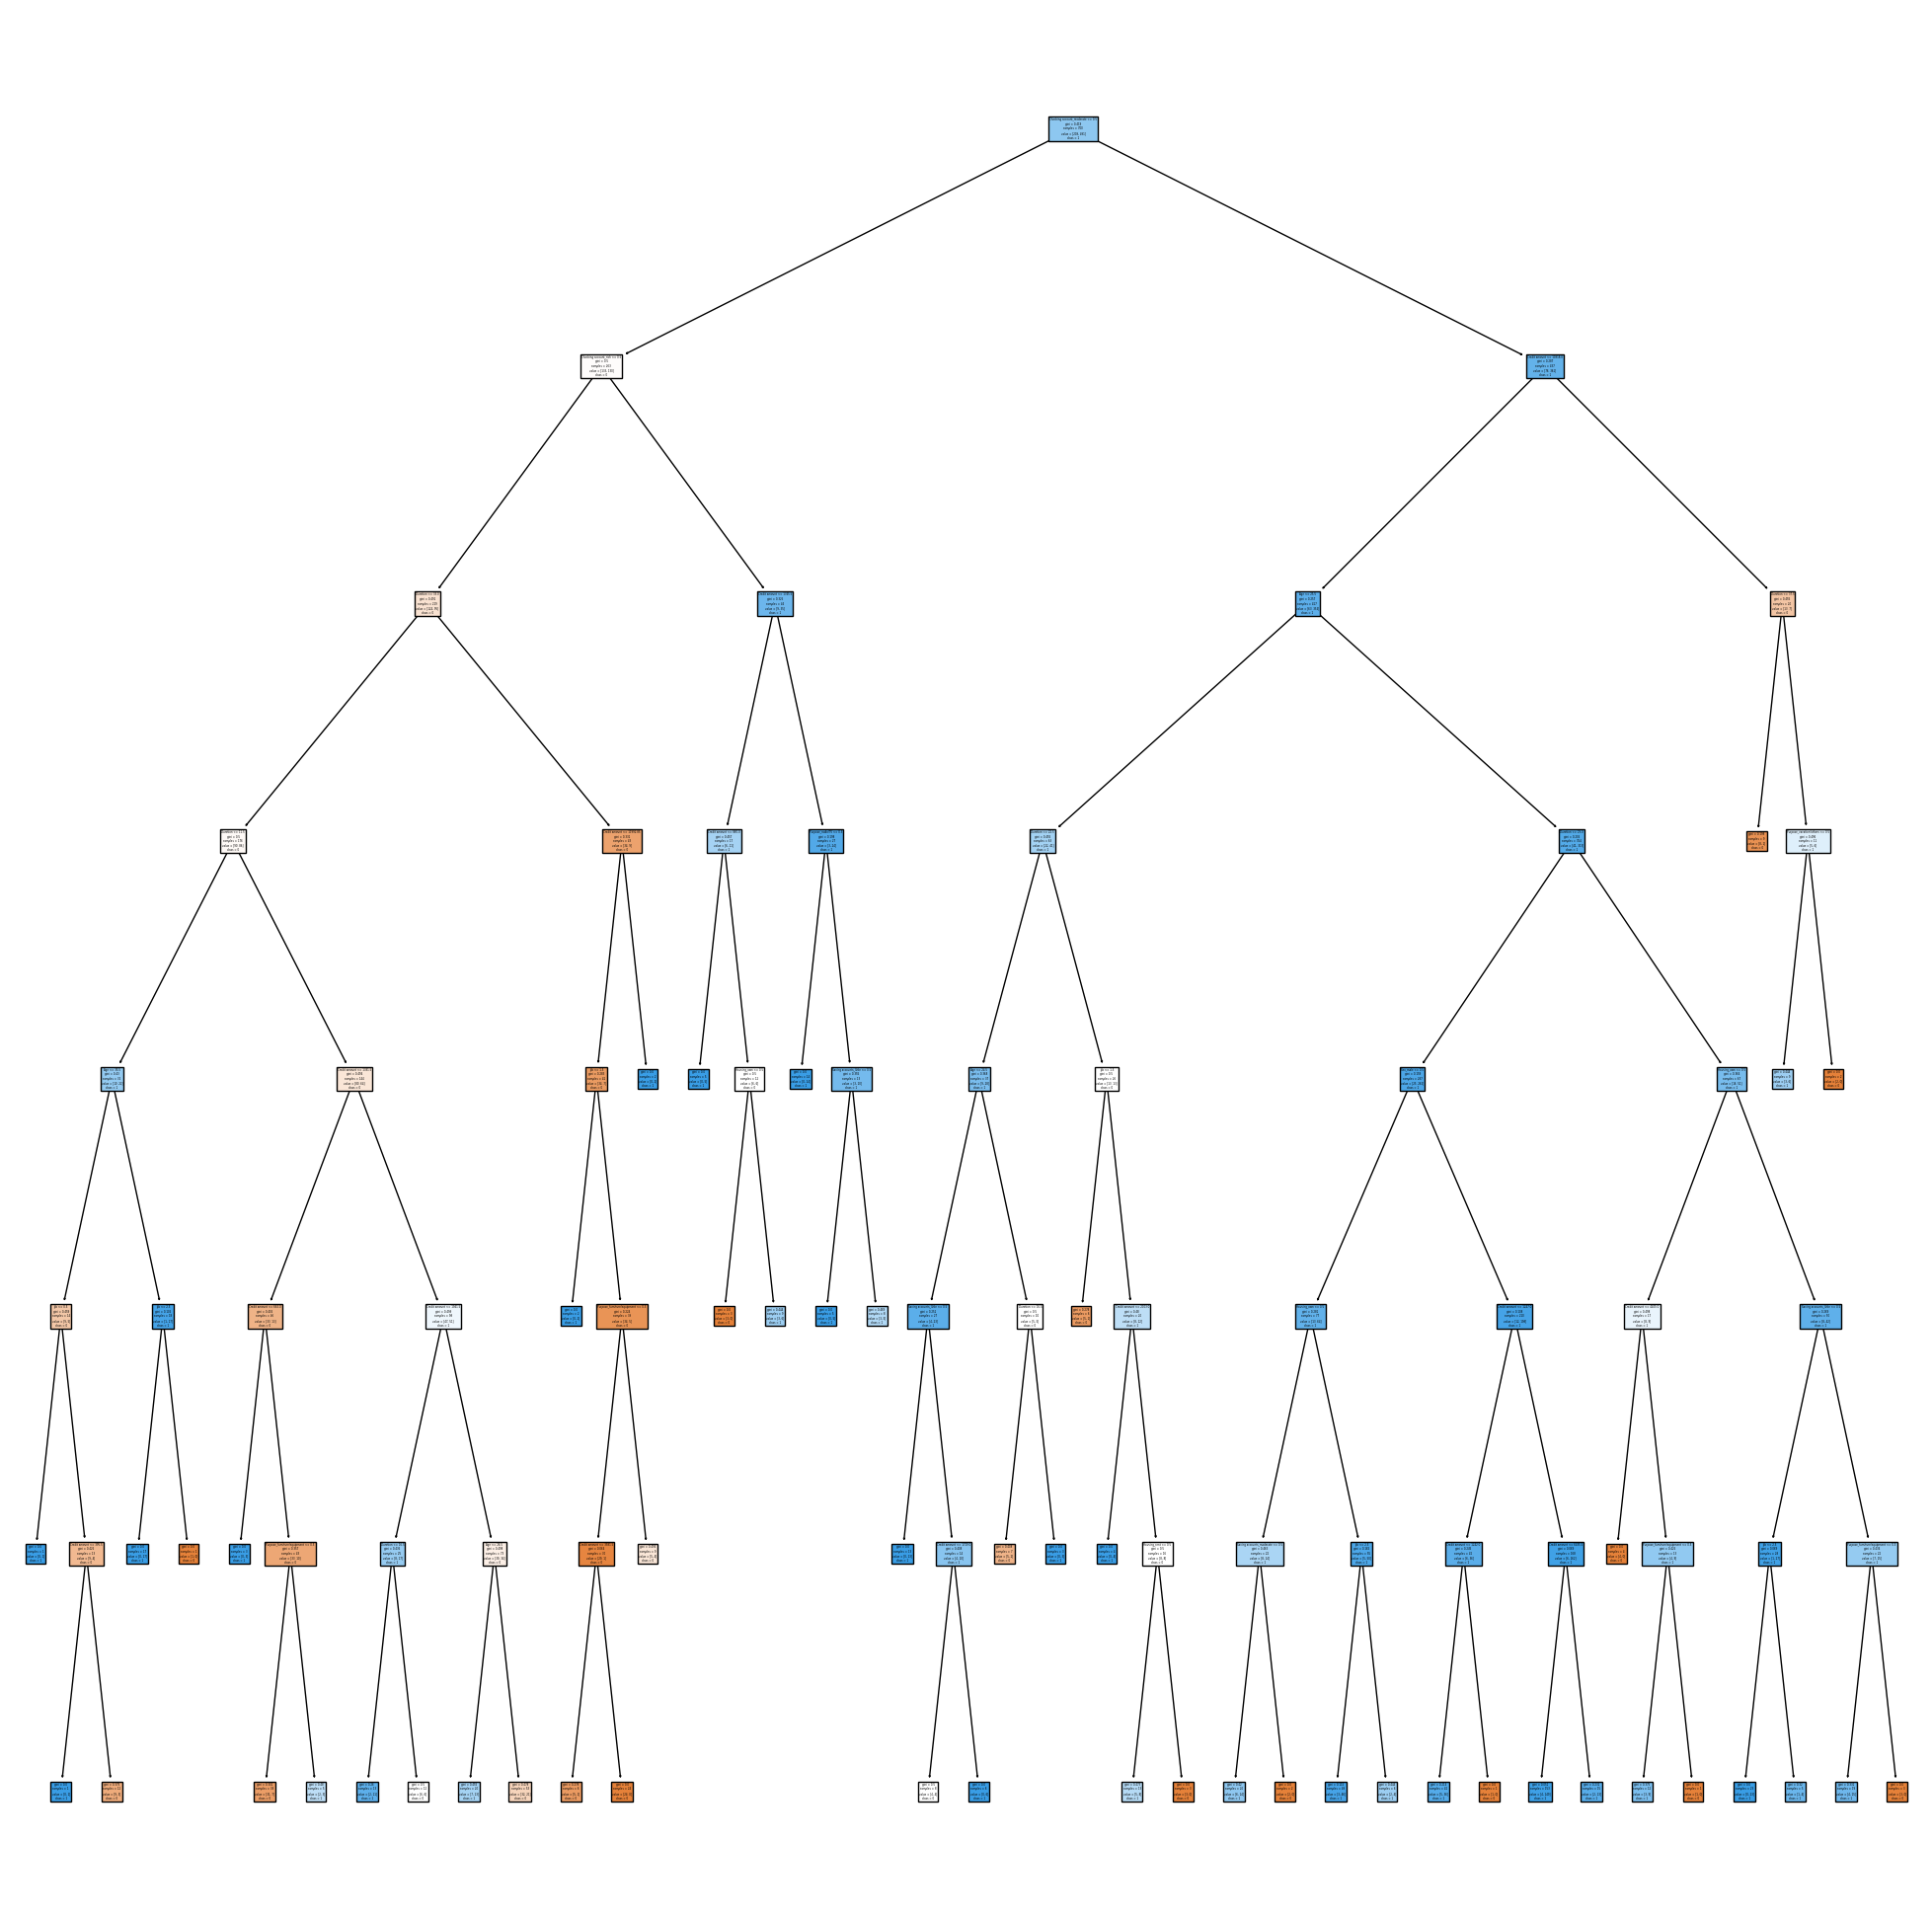

In [61]:
plt.figure(figsize=(25,25))
plot_tree(dt2,feature_names=fn, class_names=cn, filled=True)
plt.show()

#### Generate Rules

In [63]:
print(export_text(dt2,feature_names=x.columns.tolist()))

|--- Checking account_moderate <= 0.50
|   |--- Checking account_rich <= 0.50
|   |   |--- Duration <= 33.00
|   |   |   |--- Duration <= 11.50
|   |   |   |   |--- Age <= 35.50
|   |   |   |   |   |--- Job <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Job >  0.50
|   |   |   |   |   |   |--- Credit amount <= 395.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Credit amount >  395.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  35.50
|   |   |   |   |   |--- Job <= 2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Job >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Duration >  11.50
|   |   |   |   |--- Credit amount <= 1381.50
|   |   |   |   |   |--- Credit amount <= 663.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Credit amount >  663.00
|   |   |   |   |   |   |--- Purpose_furniture/equipment <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   

In [64]:
print(x.columns)

# Age = 34, Job=3,Duration= 12, Sex_Male= 0 =>

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Checking account_rich', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')


#### How to find optimal values for max_depth, criterion, mss, msl ?
1) Exceute Model across multiple loops for different hyperparamters. <br>
2) Cross Validation<br>
3) Hyperparameter Tuning<br>

#### Cross Validation

In [65]:
from sklearn.model_selection import cross_val_score

In [67]:
crit = ['gini','entropy']
md   = [5,7,9,10]
mss = [10,12,15,20]

c = 0
for i in crit:
    for j in md:
         for k in mss:
                scores = cross_val_score(DecisionTreeClassifier(criterion=i,
                                                                max_depth=j,
                                                                min_samples_split=k),
                                         x,y,scoring='accuracy',cv=5)
                # cv = number of splits
                c += 1
                print('Scores',scores)
                print(f'Iteration {c}, cri:{i},md:{j},mss:{k},Mean_Scores : {scores.mean()}')

Scores [0.76  0.715 0.715 0.75  0.775]
Iteration 1, cri:gini,md:5,mss:10,Mean_Scores : 0.743
Scores [0.76  0.715 0.715 0.745 0.765]
Iteration 2, cri:gini,md:5,mss:12,Mean_Scores : 0.74
Scores [0.76  0.715 0.725 0.745 0.765]
Iteration 3, cri:gini,md:5,mss:15,Mean_Scores : 0.7420000000000001
Scores [0.765 0.72  0.725 0.745 0.76 ]
Iteration 4, cri:gini,md:5,mss:20,Mean_Scores : 0.743
Scores [0.71  0.72  0.705 0.715 0.785]
Iteration 5, cri:gini,md:7,mss:10,Mean_Scores : 0.727
Scores [0.715 0.72  0.72  0.71  0.78 ]
Iteration 6, cri:gini,md:7,mss:12,Mean_Scores : 0.7290000000000001
Scores [0.71  0.715 0.73  0.71  0.765]
Iteration 7, cri:gini,md:7,mss:15,Mean_Scores : 0.726
Scores [0.725 0.725 0.73  0.725 0.76 ]
Iteration 8, cri:gini,md:7,mss:20,Mean_Scores : 0.733
Scores [0.665 0.7   0.675 0.7   0.73 ]
Iteration 9, cri:gini,md:9,mss:10,Mean_Scores : 0.6940000000000001
Scores [0.67  0.7   0.685 0.69  0.74 ]
Iteration 10, cri:gini,md:9,mss:12,Mean_Scores : 0.6970000000000001
Scores [0.665 0.68

#### Best Hyperparamters (based on Cross Validation)
1) cri:gini,md:5,mss:10<br>
2) cri:gini,md:5,mss:20

### HyperParameter Tuning Methods

#### 1) GridSearchCV 
a) Applies ML model on all possible combinations of Hyperparameters and
then selects the set of Hyperparameter that generates the best result 
based on the metric used.<br>
b) High time complexity.


#### 2) RandomizedSearchCV
a) Applies ML model on random subset(default = 10) of all possible combinations of Hyperparameters and
then selects the set of Hyperparameter that generates the best result out of that subset
based on the metric used.<br>
b) Low time complexity.


#### GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [70]:
hparams_dt = {'criterion': ['gini','entropy'],
             'max_depth': [5,6,7,8,9],
             'min_samples_split': [8,10,12,15,20]}

# Total Combinations
print(2*5*5)   
print(hparams_dt)

50
{'criterion': ['gini', 'entropy'], 'max_depth': [5, 6, 7, 8, 9], 'min_samples_split': [8, 10, 12, 15, 20]}


In [71]:
dt_base = DecisionTreeClassifier()
gs1 = GridSearchCV(estimator=dt_base,param_grid=hparams_dt,
                   scoring='accuracy',cv=5)
gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'min_samples_split': [8, 10, 12, 15, 20]},
             scoring='accuracy')

In [72]:
print(gs1.best_score_)  # best mean score (across 5 splits)
print(gs1.best_params_)

0.7
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}


In [75]:
gs_df = pd.DataFrame(gs1.cv_results_)
print(gs_df.shape)
gs_df.columns

(50, 16)


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [77]:
gs_df = gs_df[['param_criterion', 'param_max_depth', 
               'param_min_samples_split',
               'mean_test_score','rank_test_score']]
gs_df = gs_df.sort_values('rank_test_score')
gs_df.head()

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
1,gini,5,10,0.700000,1
6,gini,6,10,0.698571,2
30,entropy,6,8,0.697143,3
4,gini,5,20,0.697143,3
0,gini,5,8,0.695714,5


#### DT after GrdiSearchCV

In [79]:
print(gs1.best_score_)
print(gs1.best_params_)

0.7
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}


In [ ]:
# kwargs

In [100]:
dt3 = DecisionTreeClassifier(**gs1.best_params_)
dt3_res,ypred_dt3 = eval_model(dt3,x_train, x_test, y_train, 
                              y_test,'DT3(After GS)')
dt3_res

              precision    recall  f1-score   support

           0       0.64      0.25      0.36        91
           1       0.74      0.94      0.83       209

    accuracy                           0.73       300
   macro avg       0.69      0.60      0.60       300
weighted avg       0.71      0.73      0.69       300



,Train_Acc,test_Acc,Pre0,Rec0,Pre1,Rec1
DT3(After GS),0.8,0.73,0.638889,0.252747,0.742424,0.937799


#### RandomizedSearchCV

In [81]:
print(hparams_dt)

{'criterion': ['gini', 'entropy'], 'max_depth': [5, 6, 7, 8, 9], 'min_samples_split': [8, 10, 12, 15, 20]}


In [94]:
dt_base2 = DecisionTreeClassifier()

rs1 = RandomizedSearchCV(estimator=dt_base2, param_distributions=hparams_dt,
                        scoring='accuracy',cv=5,n_iter=20)
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'min_samples_split': [8, 10, 12, 15,
                                                              20]},
                   scoring='accuracy')

In [95]:
print(rs1.best_score_)
print(rs1.best_params_)

0.7042857142857143
{'min_samples_split': 8, 'max_depth': 6, 'criterion': 'gini'}


In [96]:
rs_df =  pd.DataFrame(rs1.cv_results_)
print(rs_df.shape)
rs_df.columns

(20, 16)


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_min_samples_split', 'param_max_depth', 'param_criterion',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [97]:
rs_df = rs_df[['param_criterion', 'param_max_depth', 
               'param_min_samples_split',
               'mean_test_score','rank_test_score']]

rs_df = rs_df.sort_values('rank_test_score')

rs_df.head()

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
3,gini,6,8,0.704286,1
0,gini,5,8,0.698571,2
2,entropy,6,10,0.694286,3
9,entropy,5,12,0.691429,4
4,entropy,5,15,0.690000,5


#### DT after RandomizedSearchCV

In [101]:
dt4 = DecisionTreeClassifier(**rs1.best_params_)
dt4_res,ypred_dt4 = eval_model(dt4,x_train, x_test, y_train, y_test,
                             'DT(After RS)')
dt4_res

              precision    recall  f1-score   support

           0       0.56      0.58      0.57        91
           1       0.81      0.80      0.81       209

    accuracy                           0.73       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.74      0.73      0.73       300



,Train_Acc,test_Acc,Pre0,Rec0,Pre1,Rec1
DT(After RS),0.831429,0.733333,0.557895,0.582418,0.814634,0.799043


In [103]:
all_res = pd.concat([lr1_res,dt1_res,dt2_res,dt3_res,dt4_res])
all_res

,Train_Acc,test_Acc,Pre0,Rec0,Pre1,Rec1
LogReg1,0.760000,0.766667,0.677966,0.439560,0.788382,0.909091
DT1,1.000000,0.703333,0.510000,0.560440,0.800000,0.765550
DT2(Pruned Tree),0.850000,0.716667,0.533333,0.527473,0.795238,0.799043
DT3(After GS),0.800000,0.730000,0.638889,0.252747,0.742424,0.937799
DT(After RS),0.831429,0.733333,0.557895,0.582418,0.814634,0.799043


#### Model Saving

In [104]:
import pickle

In [105]:
# Serialization
pickle.dump(dt4,open('dt_credit_risk_22Feb.pkl','wb'))

In [106]:
# deserialization
model = pickle.load(open('dt_credit_risk_22Feb.pkl','rb'))

In [ ]:
### SQL
# window functions - rank, dense_rank,row_number, lead, lag, ntile
# stored procedure, functions, triggers, cte

# SQL, Python, Stats, Tableau, Power BI, ML
# SQL, Python - 1-2 hr/day

# SQL, Python, Tableau, Power BI, Excel, Pandas, Viz - coding round

# CapStone - (SQL + Tableau/Power BI) + Pandas + Excel

In [ ]:
# KPIs - SumSales,Cat - C1, C2, C3 - C1_%Sales = 

# Filter (Yr) = 2020
# CY_Sales = 50000, PY_Sales = 70000, YOY%_Sales = 

In [ ]:
# ypred_dt4

# Cross Validation

# Model Saving - 
# Model Deployment - VS Code - Web App, AWS deploy
